Load auxiliary code:

In [1]:
import os
import sys
import numpy as np
import torch
from xai_concept_leakage.data.tabulartoy_auxiliary import (generate_tabulartoy_data, TT_dataloaders)
from xai_concept_leakage.metrics.mutual_information import estimate_MI_interconcept

master_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, master_folder)
from experiments.plotting import heatmap_groundtruth_interconcept_nMI

data_folder = master_folder + "/data/"
results_folder = master_folder + "/results/"

### Generate datasets with different ground-truth correlations

Here `delta` is the value of the off-diagonal entries in the correlation matrix used to sample the 3 latent variables:

In [2]:
delta = 0.25
n_samples = 10000

save_folder = data_folder + "TabularToy/tabulartoy_" + str(int(delta*100)) + "_" + str(int(n_samples//1000)) + "k/"

(x_train, x_val, x_test,
 c_train, c_val, c_test, 
 y_train, y_val, y_test) = generate_tabulartoy_data(delta, n_samples, save_folder)
                                                                                                   

In [3]:
delta = 0.75
n_samples = 10000

save_folder = data_folder + "TabularToy/tabulartoy_" + str(int(delta*100)) + "_" + str(int(n_samples//1000)) + "k/"

(x_train, x_val, x_test,
 c_train, c_val, c_test, 
 y_train, y_val, y_test) = generate_tabulartoy_data(delta, n_samples, save_folder)
                                                                                                   

### Visualise ground-truth interconcept normalised MIs:

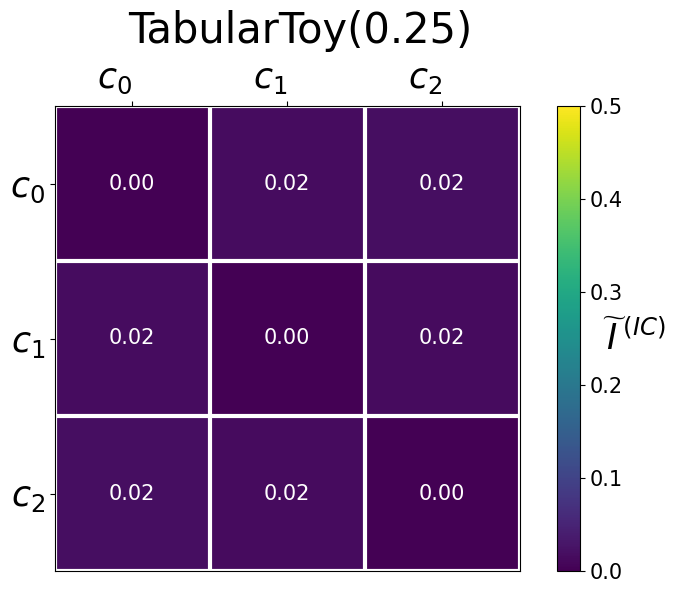

In [4]:
delta = 0.25
n_samples = 10000
save_folder = data_folder + "TabularToy/tabulartoy_" + str(int(delta*100)) + "_" + str(int(n_samples//1000)) + "k/"

train_dl, val_dl, test_dl = TT_dataloaders(save_folder)
c = torch.cat([batch[2] for batch in train_dl])
y = torch.cat([batch[1] for batch in train_dl])

IC_nMI = estimate_MI_interconcept(c, n_concepts = c.shape[-1], flatten = False, 
        n_neighbors = 3, normalise = True) 

title = f"TabularToy({delta})"
heatmap_groundtruth_interconcept_nMI(IC_nMI, title, textcolors=("white", "white"))

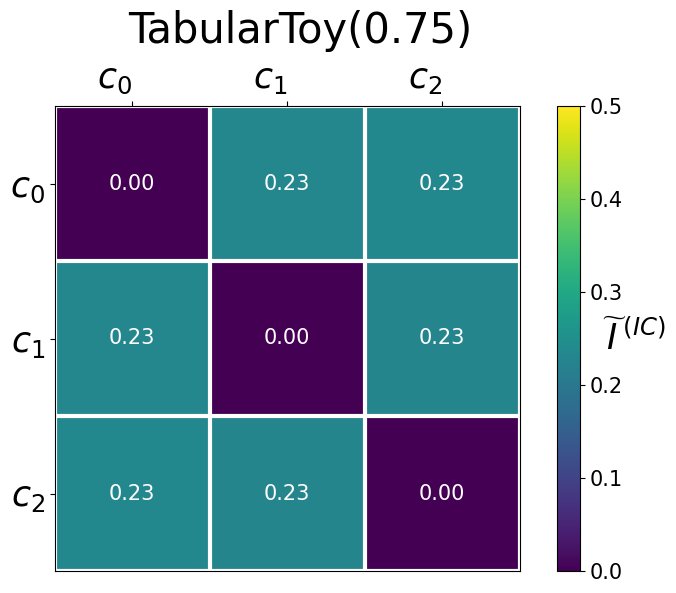

In [5]:
delta = 0.75
n_samples = 10000
save_folder = data_folder + "TabularToy/tabulartoy_" + str(int(delta*100)) + "_" + str(int(n_samples//1000)) + "k/"

train_dl, val_dl, test_dl = TT_dataloaders(save_folder)
c = torch.cat([batch[2] for batch in train_dl])
y = torch.cat([batch[1] for batch in train_dl])

IC_nMI = estimate_MI_interconcept(c, n_concepts = c.shape[-1], flatten = False, 
        n_neighbors = 3, normalise = True) 

title = f"TabularToy({delta})"
heatmap_groundtruth_interconcept_nMI(IC_nMI, title, textcolors=("white", "white"))